In [1]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt

/Users/gedena/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
%pip install numpy==1.23

  Using cached numpy-1.23.0-cp310-cp310-macosx_11_0_arm64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load and preprocess the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0


In [3]:
# Shape of the images
print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)

Shape of train_images: (60000, 28, 28, 1)
Shape of test_images: (10000, 28, 28, 1)


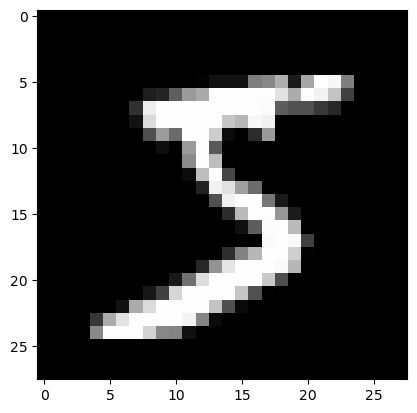

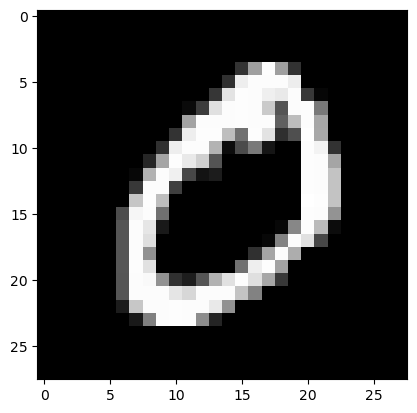

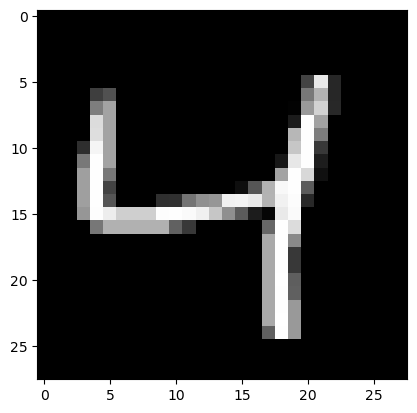

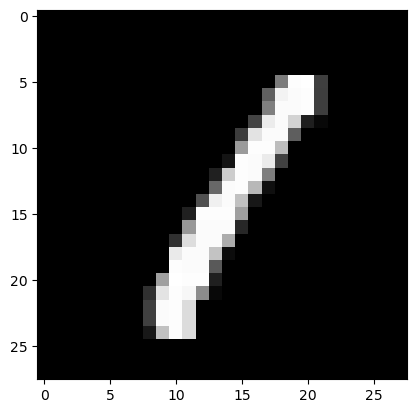

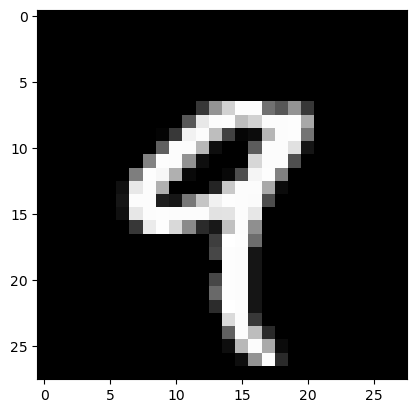

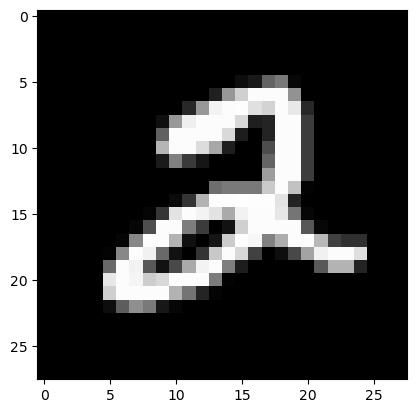

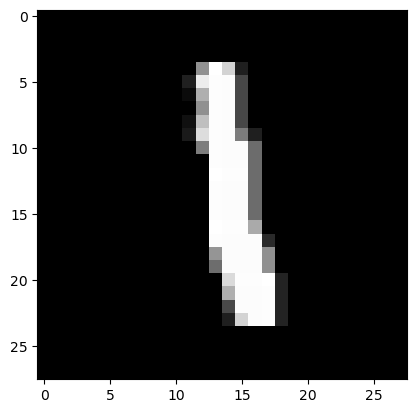

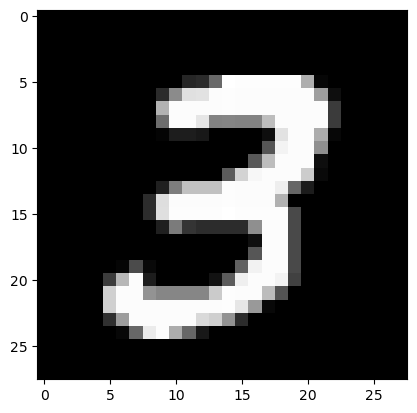

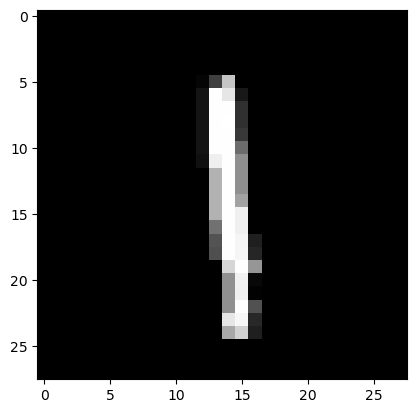

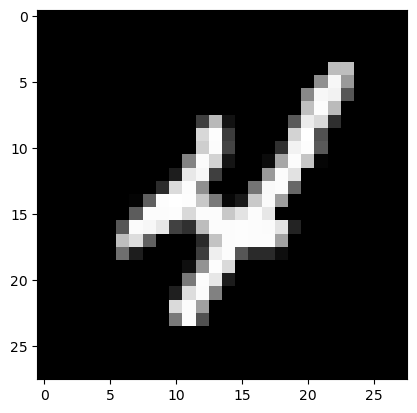

In [4]:

for i in range(10):
    plt.imshow(train_images[i].reshape((28, 28)), cmap='gray')
    plt.show()


In [5]:
print("Train labels:", train_labels[:10])


Train labels: [5 0 4 1 9 2 1 3 1 4]


In [10]:
from tensorflow.keras import models, layers


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
import tensorflow as tf

# Load and preprocess the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the input shape
input_shape = (None, 28, 28, 1)

# Define the input placeholder
inputs = tf.keras.Input(shape=input_shape, name="inputs")

# Define the target placeholder
targets = tf.keras.Input(shape=(None,), name="targets", dtype=tf.int32)

# Define the layers of the network
conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, name="conv/1")(inputs)
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, name="pool/1")(conv1)
conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, name="conv/2")(pool1)
pool2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, name="pool/2")(conv2)
flatten = tf.keras.layers.Flatten(name="flatten")(pool2)
fc1 = tf.keras.layers.Dense(units=64, activation=tf.nn.relu, name="dense/1")(flatten)
fc2 = tf.keras.layers.Dense(units=10, name="dense/2")(fc1)

# Define the loss and optimizer
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=targets, logits=fc2)
mean_loss = tf.reduce_mean(loss)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(mean_loss)

# Initialize the variables
init = tf.global_variables_initializer()

# Create a session and run the optimization loop
with tf.Session() as sess:
    # Initialize the variables
    sess.run(init)

    # Run the optimization loop for 100 epochs
    for epoch in range(100):
        # Run the optimizer on the training data
        _, loss_val = sess.run([train_op, mean_loss], feed_dict={
            inputs: train_images,
            targets: train_labels
        })

        # Print the loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print("Epoch {}: loss = {}".format(epoch + 1, loss_val))

ValueError: Input 0 of layer "pool/1" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, None, 26, 26, 32)